In [1]:
import os
import h5py

import numpy as np
import matplotlib.pyplot as plt

In [2]:
h5_dir = '/home/r10222035/SPANet2/data/triHiggs'
file_path = os.path.join(h5_dir, 'triHiggs_4b_PT40_test.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs_4b_PT40_test-predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

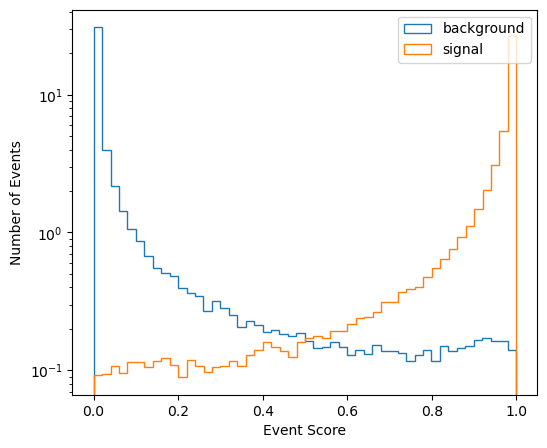

In [3]:
# plot event score distribution
y_pred = y_prob[:, 1]
y_pred_s = y_pred[y_test==1]
y_pred_b = y_pred[y_test==0]
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
bins = 50
ax.hist(y_pred_b, bins=bins, histtype='step', label='background', density=True)
ax.hist(y_pred_s, bins=bins, histtype='step', label='signal', density=True)
ax.set_xlabel('Event Score')
ax.set_ylabel('Number of Events')

ax.set_yscale('log')
ax.legend()
plt.show()

In [4]:
np.save(f'../Upper_limit/SPANet_selection/sig.npy', y_pred_s)
np.save(f'../Upper_limit/SPANet_selection/bkg.npy', y_pred_b)